# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as sts
from scipy.stats import linregress
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
city_list = []
country = []
temp = []
humidity = []
wind_speed = []
clouds = []
latitude = []
longitude = []
date = []
index_counter = 0
set_counter = 1

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [7]:
print("Start data retrieval")
print("------------------")
for city in cities:
    response = requests.get(query_url + city).json()
    if index_counter > 49:
        index_counter = 0
        set_counter += 1
    else:
        index_counter +=1 
    print (f"City number {index_counter} of set {set_counter} - {city}")
    
    try:
        country.append(response["sys"]["country"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        wind_speed.append(response["wind"]["speed"])
        clouds.append(response["clouds"]["all"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        date.append(response["dt"])
        city_list.append(city)
    except:
        print("City not found")
        
print("-------------------")
print("Data retrieval complete")

Start data retrieval
------------------
City number 1 of set 1 - hermanus
City number 2 of set 1 - kapaa
City number 3 of set 1 - bluff
City number 4 of set 1 - ushuaia
City number 5 of set 1 - punta arenas
City number 6 of set 1 - mataura
City number 7 of set 1 - mahebourg
City number 8 of set 1 - vaini
City number 9 of set 1 - severo-kurilsk
City number 10 of set 1 - cape town
City number 11 of set 1 - kailua
City number 12 of set 1 - busselton
City number 13 of set 1 - east london
City number 14 of set 1 - atuona
City number 15 of set 1 - kloulklubed
City number 16 of set 1 - hilo
City number 17 of set 1 - luanda
City number 18 of set 1 - albany
City number 19 of set 1 - bredasdorp
City number 20 of set 1 - dongli
City number 21 of set 1 - mariental
City number 22 of set 1 - umzimvubu
City not found
City number 23 of set 1 - kodiak
City number 24 of set 1 - bethel
City number 25 of set 1 - alice springs
City number 26 of set 1 - castro
City number 27 of set 1 - new norfolk
City numb

City number 19 of set 5 - fukue
City number 20 of set 5 - kamenka
City number 21 of set 5 - ostersund
City number 22 of set 5 - candido mendes
City number 23 of set 5 - gorno-chuyskiy
City not found
City number 24 of set 5 - comodoro rivadavia
City number 25 of set 5 - margate
City number 26 of set 5 - shantipur
City number 27 of set 5 - praia
City number 28 of set 5 - khatanga
City number 29 of set 5 - aklavik
City number 30 of set 5 - kizukuri
City number 31 of set 5 - pacific grove
City number 32 of set 5 - tautira
City number 33 of set 5 - nyaunglebin
City number 34 of set 5 - aktash
City number 35 of set 5 - nome
City number 36 of set 5 - salinopolis
City number 37 of set 5 - tra vinh
City number 38 of set 5 - laguna
City number 39 of set 5 - itarema
City number 40 of set 5 - freeport
City number 41 of set 5 - diapaga
City number 42 of set 5 - broken hill
City number 43 of set 5 - geraldton
City number 44 of set 5 - rey bouba
City number 45 of set 5 - yatou
City number 46 of set 5

City number 43 of set 9 - melo
City number 44 of set 9 - gari
City number 45 of set 9 - wamba
City number 46 of set 9 - port macquarie
City number 47 of set 9 - bichura
City number 48 of set 9 - dhuburi
City number 49 of set 9 - lompoc
City number 50 of set 9 - fairbanks
City number 0 of set 10 - katherine
City number 1 of set 10 - vrindavan
City number 2 of set 10 - hami
City number 3 of set 10 - shinpokh
City number 4 of set 10 - zheleznodorozhnyy
City number 5 of set 10 - cochrane
City number 6 of set 10 - cap malheureux
City number 7 of set 10 - parana
City number 8 of set 10 - emerald
City number 9 of set 10 - muros
City number 10 of set 10 - juba
City number 11 of set 10 - saint-francois
City number 12 of set 10 - santa fe
City number 13 of set 10 - yanan
City not found
City number 14 of set 10 - la pintada
City number 15 of set 10 - aswan
City number 16 of set 10 - kyra
City number 17 of set 10 - bulgan
City number 18 of set 10 - maunatlala
City number 19 of set 10 - ye
City not

In [8]:

print(len(city_list))   
print(len(country)) 
print(len(temp)) 
print(len(humidity)) 
print(len(wind_speed)) 
print(len(clouds)) 
print(len(latitude)) 
print(len(longitude))


571
571
571
571
571
571
571
571


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
 city_data = pd.DataFrame({"City":city_list,
                          "Country": country,
                          "Date":date,
                          "Max Temp (F)":temp,
                          "Humidity (%)":humidity,
                          "Wind Speed":wind_speed, 
                          "Cloudiness (%)": clouds,
                          "Latitude":latitude,
                          "Longitude":longitude})
# city_data['Date'] =pd.to_datetime(city_data.Date).dt.strftime('%m/%d/%Y')    
city_data.head()

,City,Country,Date,Max Temp (F),Humidity (%),Wind Speed,Cloudiness (%),Latitude,Longitude
0,hermanus,ZA,1603991208,55.99,62,4.00,81,-34.42,19.23
1,kapaa,US,1603991208,64.40,93,5.82,1,22.08,-159.32
2,bluff,NZ,1603991208,52.00,92,1.99,83,-46.60,168.33
3,ushuaia,AR,1603990912,46.40,81,34.45,75,-54.80,-68.30
4,punta arenas,CL,1603991208,51.01,50,38.01,85,-53.15,-70.92


In [10]:
city_data.count()

City              571
Country           571
Date              571
Max Temp (F)      571
Humidity (%)      571
Wind Speed        571
Cloudiness (%)    571
Latitude          571
Longitude         571
dtype: int64

In [52]:
city_data.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
humidity_df = city_data.loc[city_data["Humidity (%)"]>100,:]
humidity_df.count()

City              0
Country           0
Date              0
Max Temp (F)      0
Humidity (%)      0
Wind Speed        0
Cloudiness (%)    0
Latitude          0
Longitude         0
dtype: int64

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

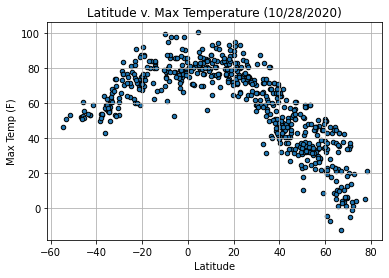

In [27]:
city_data.plot(kind="scatter",x="Latitude", y="Max Temp (F)",edgecolor="black",title="Latitude v. Max Temperature (10/28/2020)",grid=True)
plt.savefig("output_data/LatvTemp.png")
plt.show()

## Latitude vs. Humidity Plot

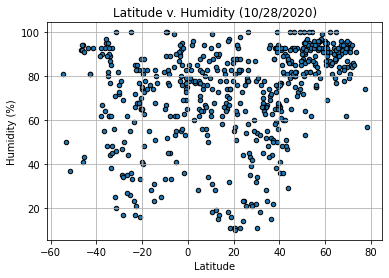

In [28]:
city_data.plot(kind="scatter",x="Latitude", y="Humidity (%)",edgecolor="black",title="Latitude v. Humidity (10/28/2020)",grid=True)
plt.savefig("output_data/LatvHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

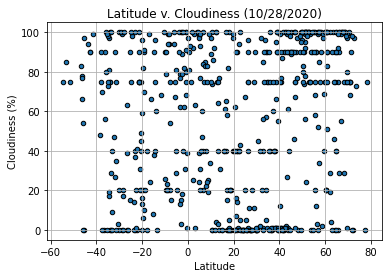

In [29]:
city_data.plot(kind="scatter",x="Latitude", y="Cloudiness (%)",edgecolor="black",title="Latitude v. Cloudiness (10/28/2020)",grid=True)
plt.savefig("output_data/LatvCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

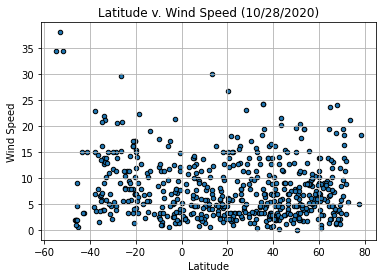

In [30]:
city_data.plot(kind="scatter",x="Latitude", y="Wind Speed",edgecolor="black",title="Latitude v. Wind Speed (10/28/2020)",grid=True)
plt.savefig("output_data/LatvWindspeed.png")
plt.show()

## Linear Regression

In [31]:
northern_hemi_df = city_data.loc[city_data["Latitude"]>= 0,:]
northern_hemi_df["Latitude"].count()

400

In [32]:
southern_hemi_df = city_data.loc[city_data["Latitude"]< 0,:]
southern_hemi_df["Latitude"].count()

171

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [33]:
slope, intercept,rvalue,pvalue,sems = linregress(northern_hemi_df["Latitude"],northern_hemi_df["Max Temp (F)"])
regress_values = slope*(northern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(northern_hemi_df["Latitude"],northern_hemi_df["Max Temp (F)"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

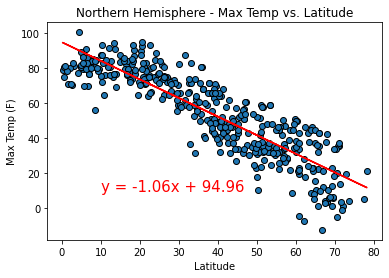

The correlation coefficient is -0.88, suggesting there is a strong negative relationship 


In [34]:
plt.scatter(northern_hemi_df["Latitude"],northern_hemi_df["Max Temp (F)"], edgecolor='black')
plt.plot(northern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.annotate(eq,(10,10),color="r",fontsize=15)
plt.savefig("output_data/NHTempvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, suggesting there is a strong negative relationship ")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [35]:
slope, intercept,rvalue,pvalue,sems = linregress(southern_hemi_df["Latitude"],southern_hemi_df["Max Temp (F)"])
regress_values = slope*(southern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(southern_hemi_df["Latitude"],southern_hemi_df["Max Temp (F)"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

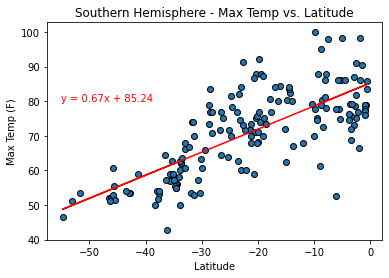

The correlation coefficient is 0.74, suggesting there is a moderate-strong positive relationship 


In [36]:
plt.scatter(southern_hemi_df["Latitude"],southern_hemi_df["Max Temp (F)"], edgecolor='black')
plt.plot(southern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.annotate(eq, (-55,80),color="r")
plt.savefig("output_data/SHTempvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, suggesting there is a moderate-strong positive relationship ")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [37]:
slope, intercept,rvalue,pvalue,sems = linregress(northern_hemi_df["Latitude"],northern_hemi_df["Humidity (%)"])
regress_values = slope*(northern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(northern_hemi_df["Latitude"],northern_hemi_df["Humidity (%)"])[0],2)
eq = eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

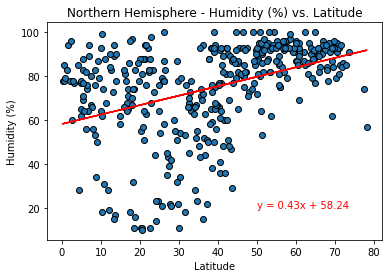

The correlation coefficient is 0.4, suggesting there is a weak positive relationship 


In [38]:
plt.scatter(northern_hemi_df["Latitude"],northern_hemi_df["Humidity (%)"], edgecolor='black')
plt.plot(northern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.annotate(eq, (50,20),color="r")
plt.savefig("output_data/NHHumidvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, suggesting there is a weak positive relationship ")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [39]:
slope, intercept,rvalue,pvalue,sems = linregress(southern_hemi_df["Latitude"],southern_hemi_df["Humidity (%)"])
regress_values = slope*(southern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(southern_hemi_df["Latitude"],southern_hemi_df["Humidity (%)"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

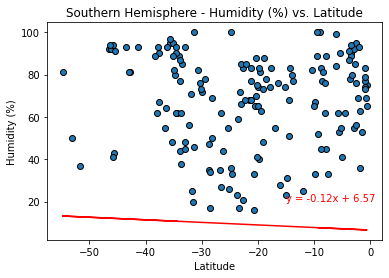

The correlation coefficient is -0.25, suggesting there is a weak negative relationship 


In [50]:
plt.scatter(southern_hemi_df["Latitude"],southern_hemi_df["Humidity (%)"], edgecolor='black')
plt.plot(southern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.annotate(eq,(-15,20),color="r")
plt.savefig("output_data/SHHumidvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, suggesting there is a weak negative relationship ")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [52]:
slope, intercept,rvalue,pvalue,sems = linregress(northern_hemi_df["Latitude"],northern_hemi_df["Cloudiness (%)"])
regress_values = slope*(northern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(northern_hemi_df["Latitude"],northern_hemi_df["Cloudiness (%)"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

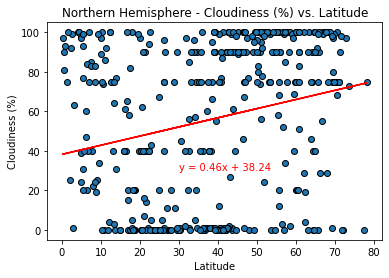

The correlation coefficient is 0.23, suggesting there is a weak positive relationship 


In [54]:
plt.scatter(northern_hemi_df["Latitude"],northern_hemi_df["Cloudiness (%)"], edgecolor='black')
plt.plot(northern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.annotate(eq, (30,30),color="r")
plt.savefig("output_data/NHCloudvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, suggesting there is a weak positive relationship ")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [55]:
slope, intercept,rvalue,pvalue,sems = linregress(southern_hemi_df["Latitude"],southern_hemi_df["Cloudiness (%)"])
regress_values = slope*(southern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(southern_hemi_df["Latitude"],southern_hemi_df["Cloudiness (%)"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

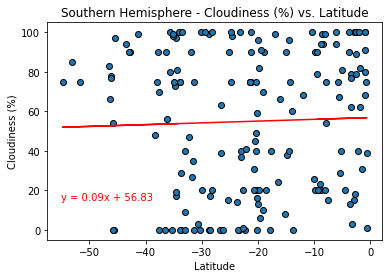

The correlation coefficient is 0.03, suggesting there is a minimal relationship 


In [57]:
plt.scatter(southern_hemi_df["Latitude"],southern_hemi_df["Cloudiness (%)"], edgecolor='black')
plt.plot(southern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.annotate(eq,(-55,15),color='r')
plt.savefig("output_data/SHCloudvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, suggesting there is a minimal relationship ")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [58]:
slope, intercept,rvalue,pvalue,sems = linregress(northern_hemi_df["Latitude"],northern_hemi_df["Wind Speed"])
regress_values = slope*(northern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(northern_hemi_df["Latitude"],northern_hemi_df["Wind Speed"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

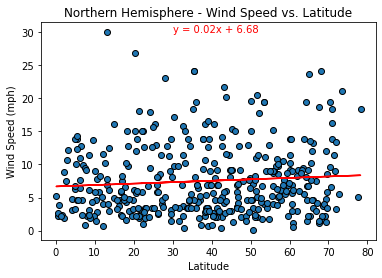

The correlation coefficient is 0.08, suggesting there is a minimal relationship 


In [59]:
plt.scatter(northern_hemi_df["Latitude"],northern_hemi_df["Wind Speed"], edgecolor='black')
plt.plot(northern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('Northern Hemisphere - Wind Speed vs. Latitude')
plt.annotate(eq,(30,30),color="r")
plt.savefig("output_data/NHwindspeedvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, suggesting there is a minimal relationship ")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [60]:
slope, intercept,rvalue,pvalue,sems = linregress(southern_hemi_df["Latitude"],southern_hemi_df["Wind Speed"])
regress_values = slope*(southern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(southern_hemi_df["Latitude"],southern_hemi_df["Wind Speed"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

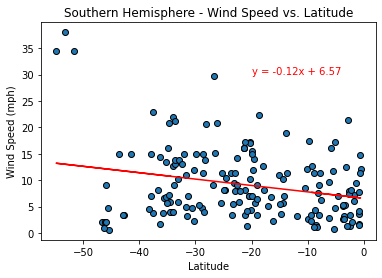

The correlation coefficient is -0.25, suggesting there is a weak negative relationship 


In [61]:
plt.scatter(southern_hemi_df["Latitude"],southern_hemi_df["Wind Speed"], edgecolor='black')
plt.plot(southern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('Southern Hemisphere - Wind Speed vs. Latitude')
plt.annotate(eq,(-20,30),color="r")
plt.savefig("output_data/SHwindspeedvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, suggesting there is a weak negative relationship ")